# RESTAURANT VISITORS TIME SERIES ANALYSIS PROJECT 


Objective :
    
    To forecast the number of vistors in restaurant for a daily data 


_______________________________________________________________________
importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

#### Loading the data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ubaid-shah/Time_Series_Analysis_ITVedant/main/TSA%20with%20python/TSA_COURSE_NOTEBOOKS/Data/RestaurantVisitors.csv',index_col="date",parse_dates=True)

In [3]:
df.head(30)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
2016-01-06,Wednesday,0,na,9.0,11.0,22.0,41.0,83.0
2016-01-07,Thursday,0,na,15.0,6.0,18.0,30.0,69.0
2016-01-08,Friday,0,na,79.0,32.0,22.0,16.0,149.0
2016-01-09,Saturday,0,na,44.0,44.0,47.0,99.0,234.0


### We want to analyze the total number of visitors 

In [4]:
data=df["total"]

In [5]:
data

date
2016-01-01    296.0
2016-01-02    191.0
2016-01-03    202.0
2016-01-04    105.0
2016-01-05     98.0
              ...  
2017-05-27      NaN
2017-05-28      NaN
2017-05-29      NaN
2017-05-30      NaN
2017-05-31      NaN
Name: total, Length: 517, dtype: float64

In [6]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Series name: total
Non-Null Count  Dtype  
--------------  -----  
478 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [7]:
data[data.isna()]

date
2017-04-23   NaN
2017-04-24   NaN
2017-04-25   NaN
2017-04-26   NaN
2017-04-27   NaN
2017-04-28   NaN
2017-04-29   NaN
2017-04-30   NaN
2017-05-01   NaN
2017-05-02   NaN
2017-05-03   NaN
2017-05-04   NaN
2017-05-05   NaN
2017-05-06   NaN
2017-05-07   NaN
2017-05-08   NaN
2017-05-09   NaN
2017-05-10   NaN
2017-05-11   NaN
2017-05-12   NaN
2017-05-13   NaN
2017-05-14   NaN
2017-05-15   NaN
2017-05-16   NaN
2017-05-17   NaN
2017-05-18   NaN
2017-05-19   NaN
2017-05-20   NaN
2017-05-21   NaN
2017-05-22   NaN
2017-05-23   NaN
2017-05-24   NaN
2017-05-25   NaN
2017-05-26   NaN
2017-05-27   NaN
2017-05-28   NaN
2017-05-29   NaN
2017-05-30   NaN
2017-05-31   NaN
Name: total, dtype: float64

In [8]:
data.tail(45)

date
2017-04-17    140.0
2017-04-18     91.0
2017-04-19     79.0
2017-04-20     90.0
2017-04-21    165.0
2017-04-22    226.0
2017-04-23      NaN
2017-04-24      NaN
2017-04-25      NaN
2017-04-26      NaN
2017-04-27      NaN
2017-04-28      NaN
2017-04-29      NaN
2017-04-30      NaN
2017-05-01      NaN
2017-05-02      NaN
2017-05-03      NaN
2017-05-04      NaN
2017-05-05      NaN
2017-05-06      NaN
2017-05-07      NaN
2017-05-08      NaN
2017-05-09      NaN
2017-05-10      NaN
2017-05-11      NaN
2017-05-12      NaN
2017-05-13      NaN
2017-05-14      NaN
2017-05-15      NaN
2017-05-16      NaN
2017-05-17      NaN
2017-05-18      NaN
2017-05-19      NaN
2017-05-20      NaN
2017-05-21      NaN
2017-05-22      NaN
2017-05-23      NaN
2017-05-24      NaN
2017-05-25      NaN
2017-05-26      NaN
2017-05-27      NaN
2017-05-28      NaN
2017-05-29      NaN
2017-05-30      NaN
2017-05-31      NaN
Name: total, dtype: float64

##
we can observe that the observations are recorded only till 24 April so we can remove the null values

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Series name: total
Non-Null Count  Dtype  
--------------  -----  
478 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB


In [11]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22'],
              dtype='datetime64[ns]', name='date', length=478, freq=None)

#### Since the data is on daily basis we will convert index frequency as daily 

In [12]:
data.index.freq='d'


In [13]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22'],
              dtype='datetime64[ns]', name='date', length=478, freq='D')

In [14]:
tsa=pd.DataFrame(data)

In [15]:
tsa

,total
date,
2016-01-01,296.0
2016-01-02,191.0
2016-01-03,202.0
2016-01-04,105.0
2016-01-05,98.0
...,...
2017-04-18,91.0
2017-04-19,79.0
2017-04-20,90.0


<AxesSubplot:xlabel='date'>

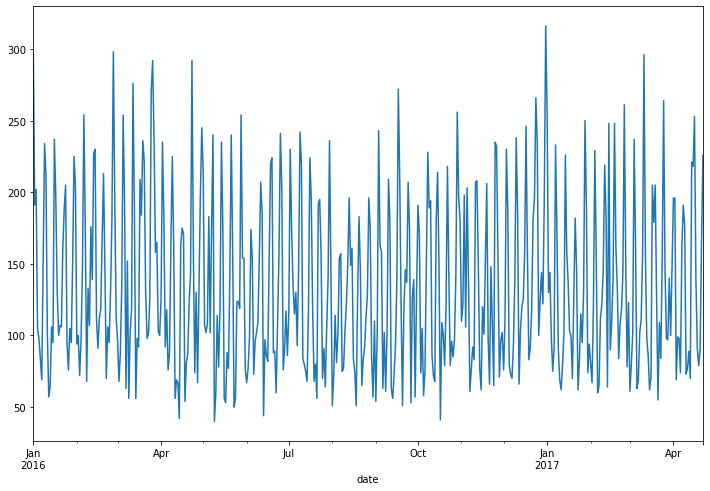

In [16]:
tsa["total"].plot(figsize=(12,8))

### Checking for the STATIONARITY in series 

This can be done in 2 ways:

1.PLOTTING GRAPH: ETS decomposition 

2.STATISTICAL TEST :Augmented Dickey Fuller Test

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
x=seasonal_decompose(tsa["total"])

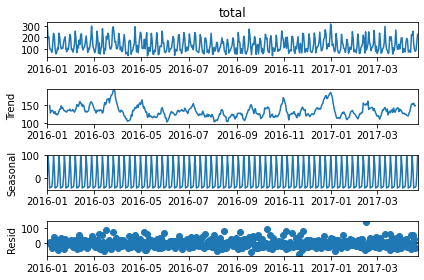

In [19]:
x.plot();

<AxesSubplot:xlabel='date'>

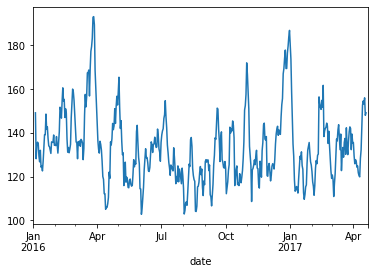

In [20]:
x.trend.plot()

<AxesSubplot:xlabel='date'>

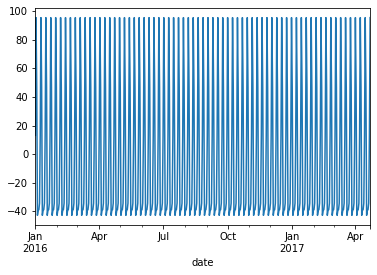

In [21]:
x.seasonal.plot()

#### By the plot above, the data seems to be STATIONARY

## Checking stationarity with Statistical test

In [22]:
#ADF TEST
from statsmodels.tsa.stattools import adfuller

def adf_test(tsa_data,col):
    print(f"AUGMENTED DICKEY FULLER TEST FOR {col.upper()}")
    print("\nH0: Data has UNIT ROOT and is NON-STATIONARY\nH1: Data has NO UNIT ROOT and is STATIONARY")
    print("Reference p-value:0.05")
    res=adfuller(tsa_data.dropna(),autolag="AIC")
    index=["ADF test statistic","P value","No. of lags used","No of observations"]
    output=pd.Series(res[:4],index=index)
    print()
    print(output)
    print("---"*15)
    print("\nResults of ADF TEST:\n")
    
    ''' for p value less than 0.05 we reject null hypothesis i.e data is stationary
        else we do not reject H0
    
    '''
    if res[1]<0.05:
        print("Strong evidence against null hypothesis\nRejet the null hypothesis")
        print("Data has NO UNIT ROOT and is STATIONARY ")
    else:
        print("Weak evidence against null hypothesis")
        print("Do not Reject H0\nData has UNIT ROOT and is NON-STATIONARY ")

In [23]:
adf_test(tsa.total,"total")

AUGMENTED DICKEY FULLER TEST FOR TOTAL

H0: Data has UNIT ROOT and is NON-STATIONARY
H1: Data has NO UNIT ROOT and is STATIONARY
Reference p-value:0.05

ADF test statistic     -5.592497
P value                 0.000001
No. of lags used       18.000000
No of observations    459.000000
dtype: float64
---------------------------------------------

Results of ADF TEST:

Strong evidence against null hypothesis
Rejet the null hypothesis
Data has NO UNIT ROOT and is STATIONARY 


##### Splitting data into train test dataset

In [24]:
train=tsa[:436]

In [25]:
test=tsa[436:]

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

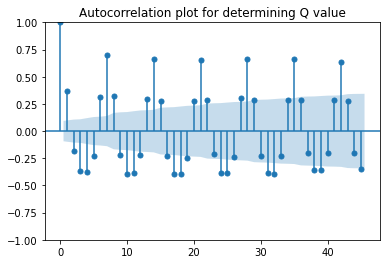

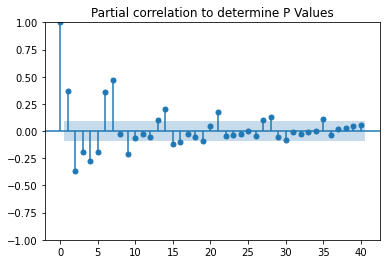

In [27]:
title="Autocorrelation plot for determining Q value"
lags=45
plot_acf(train,title=title,lags=lags);
title='Partial correlation to determine P Values'
lags=40
plot_pacf(train,title=title,lags=lags,method='ywm');    

In [28]:
# !pip install pmdarima

In [29]:
from pmdarima.arima import auto_arima

In [30]:
arima_model=auto_arima(train,seasonal=True,m=7,stationary=True,stepwise=False,trace=1,random_state=3)

 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=4809.926, Time=0.42 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=4648.327, Time=0.49 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=4578.361, Time=0.90 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=4499.838, Time=0.94 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4342.331, Time=1.88 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=4561.333, Time=3.02 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=4442.352, Time=3.17 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=4662.621, Time=4.47 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=4711.793, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4606.228, Time=0.79 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=4547.071, Time=1.55 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=4489.132, Time=1.81 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=4403.309, Time=2.82 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=4460.001, Time=3.40 sec
 ARIMA(0,0,1)(2

In [31]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2167.166
Date:                   Tue, 11 Jul 2023   AIC                           4342.331
Time:                           13:52:46   BIC                           4358.642
Sample:                       01-01-2016   HQIC                          4348.768
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6404      0.916      1.791      0.073      -0.155       3.436
ar.S.L7        0.9863      0.007    136.449      0.000       0.972       1.000
ma.S.L7       -0.8432      0.041    -20.551      0.000      -0.924      -0.763
sigma2      1183.8244     69.038     17.147      0.000    1048.512    1319.137
===================================================================================
Ljung-Box (L1) (Q):                  18.47   Jarque-Bera (JB):                83.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.84
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA MODEL

In [32]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [33]:
arimamodel=ARIMA(train,order=(0,0,0))
results=arimamodel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  total   No. Observations:                  436
Model:                          ARIMA   Log Likelihood               -2402.963
Date:                Tue, 11 Jul 2023   AIC                           4809.926
Time:                        13:52:46   BIC                           4818.082
Sample:                    01-01-2016   HQIC                          4813.145
                         - 03-11-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.7477      3.409     39.229      0.000     127.065     140.430
sigma2      3586.4067    321.120     11.168      0.000    2957.022    4215.791
===================================================================================
Ljung-Box (L1) (Q):                  58.45   Jarque-Bera (JB):                37.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.69
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
prediction=results.get_forecast(steps=len(test))      #steps should be no.of periods in test data

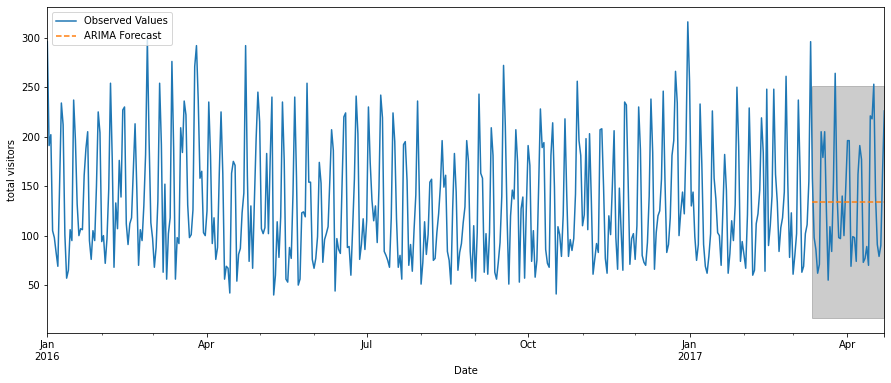

In [35]:
ax1=data["2016":].plot(label='Observed Values')
prediction.predicted_mean.plot(ax=ax1,label='ARIMA Forecast',figsize=(15,6),linestyle='dashed')
pred_ci=prediction.conf_int()
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)     #shaded area is CI
ax1.set_xlabel('Date')
ax1.set_ylabel('total visitors')
plt.legend(loc='upper left')
plt.show()

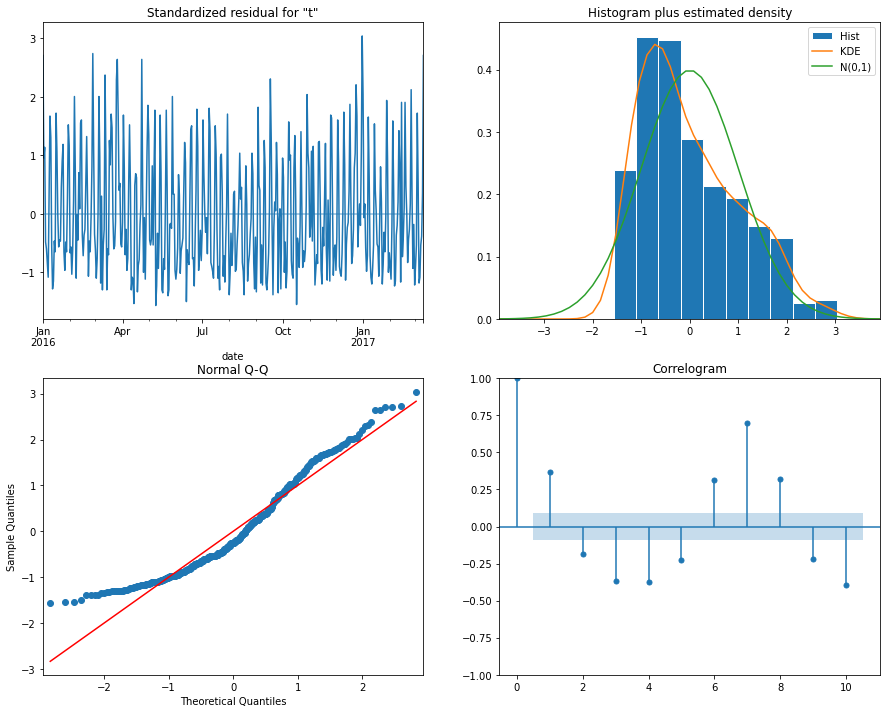

In [36]:
results.plot_diagnostics(figsize = (15, 12))
plt.show()

In [37]:
# fig1, ax2 = plt.subplots(figsize=(15, 6))
# test.plot(ax=ax2, label='Actual y value')
# prediction.predicted_mean.plot(ax=ax2, label='Predicted Y Values')
# ax2.set(title="Actual vs Predicted value[ARIMA]", xlabel="date", ylabel="Visitors")
# plt.legend()
# plt.show()


## SARIMAX

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
model1=SARIMAX(train,order=(0,0,0),seasonal_order=(1,0,1,7),enforce_stationarity=False,enforce_invertibility=False)
fitted_model=model1.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2105.589
Date:                   Tue, 11 Jul 2023   AIC                           4217.178
Time:                           13:52:50   BIC                           4229.355
Sample:                       01-01-2016   HQIC                          4221.987
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9992      0.001   1085.998      0.000       0.997       1.001
ma.S.L7       -1.0522      0.026    -39.774      0.000      -1.104      -1.000
sigma2       954.6938     67.169     14.213      0.000     823.046    1086.342
===================================================================================
Ljung-Box (L1) (Q):                  19.23   Jarque-Bera (JB):               112.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.91
Prob(H) (two-sided):                  0.59   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

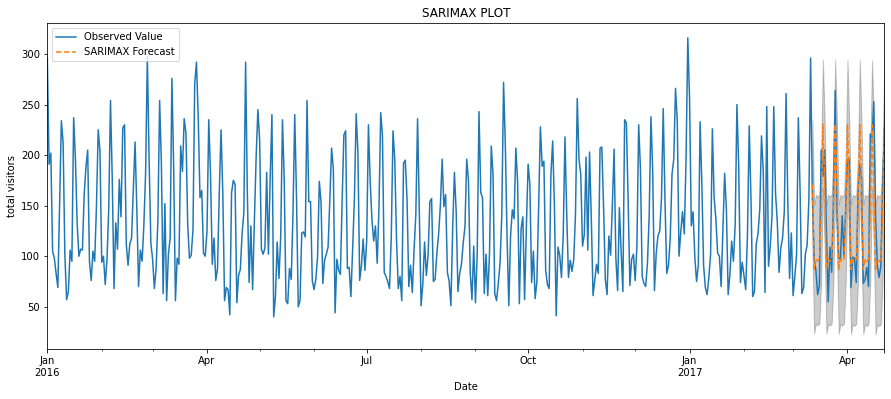

In [40]:
pred25=fitted_model.get_forecast(steps=len(test))
ax1=data['2016':].plot(label='Observed Value')
pred25.predicted_mean.plot(ax=ax1,label='SARIMAX Forecast',figsize=(15,6),linestyle='dashed')
pred_ci=pred25.conf_int()
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)
ax1.set_xlabel('Date')
plt.title("SARIMAX PLOT")
ax1.set_ylabel('total visitors')
plt.legend(loc='upper left')
plt.show()

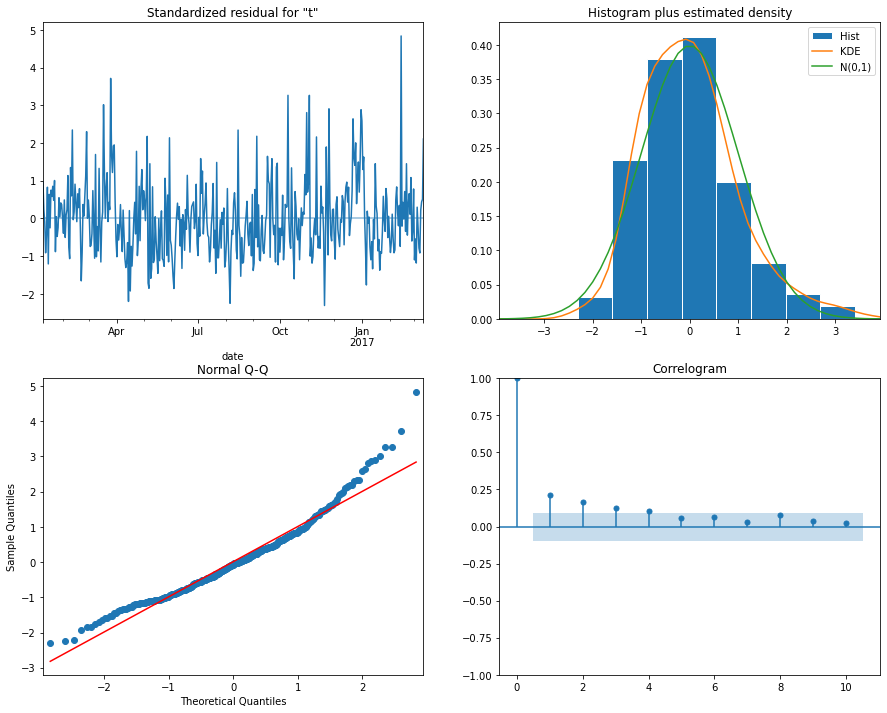

In [41]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

# Actual vs Predicted

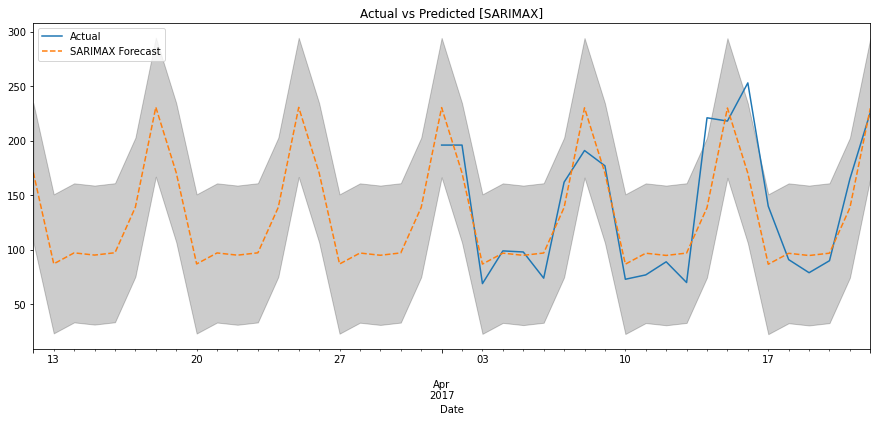

In [42]:
ax3=data["2017-04-01":].plot(label="Actual")
pred25.predicted_mean.plot(ax=ax3,label='SARIMAX Forecast',figsize=(15,6),linestyle='dashed')
ax3.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color="k",alpha=0.2)
ax3.set_xlabel('Date')
plt.title("Actual vs Predicted [SARIMAX]")
ax1.set_ylabel('total visitors')
plt.legend(loc='upper left')
plt.show()

### Evaluation of Model

In [43]:
sarimax_forecast=pred25.predicted_mean
actual_y=test["total"]
mse_sarimax=((sarimax_forecast-actual_y)**2).mean()
print(f"Mean Squared Error of Sarimax model is {round(mse_sarimax,2)}")
print(f"Root Mean Squared Error of Sarimax model is {round(np.sqrt(mse_sarimax),2)}")

Mean Squared Error of Sarimax model is 1000.45
Root Mean Squared Error of Sarimax model is 31.63


## LSTM MODEL

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
scaled_train=sc.fit_transform(np.array(train).reshape(-1,1))
scaled_train

array([[ 2.70934655],
       [ 0.95601917],
       [ 1.13970109],
       [-0.48003943],
       [-0.59692792],
       [-0.84740326],
       [-1.08118025],
       [ 0.25468823],
       [ 1.67404848],
       [ 1.30668465],
       [-0.54683286],
       [-1.28156052],
       [-1.14797367],
       [-0.46334108],
       [-0.64702299],
       [ 1.72414355],
       [ 1.05620931],
       [-0.02918382],
       [-0.56353121],
       [-0.44664272],
       [-0.46334108],
       [ 0.4550685 ],
       [ 0.90592411],
       [ 1.18979616],
       [-0.64702299],
       [-0.96429175],
       [-0.48003943],
       [-0.64702299],
       [ 0.27138658],
       [ 1.52376328],
       [ 1.1730978 ],
       [-0.66372135],
       [-0.56353121],
       [-1.03108518],
       [-0.61362628],
       [ 0.22129151],
       [ 2.0080156 ],
       [ 0.72224219],
       [-1.0978786 ],
       [-0.01248547],
       [-0.44664272],
       [ 0.70554384],
       [ 0.08770467],
       [ 1.55715999],
       [ 1.60725506],
       [-0

In [46]:
from keras.preprocessing.sequence import TimeseriesGenerator
window_size=50    #no of inputs from trained data
generator=TimeseriesGenerator(scaled_train,scaled_train,length=window_size,batch_size=1)

In [47]:
len(generator)

386

In [48]:
x,y=generator[0]

In [49]:
print(x,y)

[[[ 2.70934655]
  [ 0.95601917]
  [ 1.13970109]
  [-0.48003943]
  [-0.59692792]
  [-0.84740326]
  [-1.08118025]
  [ 0.25468823]
  [ 1.67404848]
  [ 1.30668465]
  [-0.54683286]
  [-1.28156052]
  [-1.14797367]
  [-0.46334108]
  [-0.64702299]
  [ 1.72414355]
  [ 1.05620931]
  [-0.02918382]
  [-0.56353121]
  [-0.44664272]
  [-0.46334108]
  [ 0.4550685 ]
  [ 0.90592411]
  [ 1.18979616]
  [-0.64702299]
  [-0.96429175]
  [-0.48003943]
  [-0.64702299]
  [ 0.27138658]
  [ 1.52376328]
  [ 1.1730978 ]
  [-0.66372135]
  [-0.56353121]
  [-1.03108518]
  [-0.61362628]
  [ 0.22129151]
  [ 2.0080156 ]
  [ 0.72224219]
  [-1.0978786 ]
  [-0.01248547]
  [-0.44664272]
  [ 0.70554384]
  [ 0.08770467]
  [ 1.55715999]
  [ 1.60725506]
  [-0.36315094]
  [-0.71381642]
  [-0.36315094]
  [-0.26296081]
  [ 0.55525863]]] [[1.323383]]


In [50]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense
model=tf.keras.models.Sequential()
model.add(LSTM(256,activation="relu",input_shape=(window_size,1),return_sequences=True))
model.add(LSTM(124,activation="relu"))
model.add(Dense(1))

In [51]:
model.compile(loss="mse",optimizer="adam")


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 124)               188976    
                                                                 
 dense (Dense)               (None, 1)                 125       
                                                                 
Total params: 453,293
Trainable params: 453,293
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r"total.h5", 
                             monitor = 'loss', save_best_only = True)

In [54]:
import random as rd
rd.seed(25)
np.random.seed(13)
tf.random.set_seed(13)

In [ ]:
history=model.fit(generator,epochs=25,callbacks=[checkpoint])

Epoch 1/25
386/386 [==============================] - 68s 151ms/step - loss: 1.0102
Epoch 2/25
386/386 [==============================] - 62s 161ms/step - loss: 1.0054
Epoch 3/25
386/386 [==============================] - 51s 131ms/step - loss: 0.9865
Epoch 4/25
386/386 [==============================] - 49s 126ms/step - loss: 138.0985
Epoch 5/25
386/386 [==============================] - 49s 126ms/step - loss: 0.9800
Epoch 6/25
386/386 [==============================] - 49s 127ms/step - loss: 0.9422
Epoch 7/25
386/386 [==============================] - 51s 132ms/step - loss: 2.1069
Epoch 8/25
386/386 [==============================] - 50s 130ms/step - loss: 8923.6416
Epoch 9/25
386/386 [==============================] - 49s 126ms/step - loss: 1.3110
Epoch 10/25
386/386 [==============================] - 51s 133ms/step - loss: 0.9839
Epoch 11/25
386/386 [==============================] - 55s 142ms/step - loss: 0.8737
Epoch 12/25
 68/386 [====>.........................] - ETA: 40s - los

In [ ]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs", fontsize = 10)
plt.ylabel("Loss", fontsize = 10)
plt.legend(["Loss"])
plt.title("Training Loss", fontsize = 15)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model=load_model(r'total.h5')

In [ ]:
#Creating an empty forecasts list:
lstm_predictions_scaled = []

#Creating a batch of the latest data points based on the window size for forecast:
batch = scaled_train[-window_size:]
#Reshaping the batch as per model requirements:
current_batch = batch.reshape((1, window_size, 1))


for i in range(len(test)):
    lstm_pred = model.predict(current_batch)[0]
    #Appending the next month forecast to the forecasts list:
    lstm_predictions_scaled.append(lstm_pred) 
    #removing the earliest data point in its place to preserve the window size:
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis = 1)
    
#Since the original values were scaled before training the model, we need to 
#inverse scale the forecast in order to get the forecast for the original data. 
lstm_predictions = sc.inverse_transform(lstm_predictions_scaled)

In [ ]:
for i in range(0,len(lstm_predictions)):
    pred_value=lstm_predictions[i][0]
    
pred_value
    

In [ ]:
lstm_pred = pd.DataFrame(data = [lstm_predictions[i][0] for i in range(0, len(lstm_predictions))], columns = ['LSTM Forecast']).set_index(test.index)

lstm_pred

In [ ]:
ax35 = data['2016':].plot(label = 'Observed')

lstm_pred.plot(ax = ax35, label = 'LSTM Forecast', figsize = (15, 6), linewidth = 2, linestyle = 'dashed')
ax35.set_xlabel('Date')
ax35.set_ylabel('infl')
plt.legend()
plt.show()

In [ ]:
y_forecasted_LSTM = lstm_pred['LSTM Forecast']
y_truth = test["total"]
mse_LSTM = ((y_forecasted_LSTM - y_truth) ** 2).mean()
print('The Mean Squared Error of LSTM forecast is {}'.format(round(mse_LSTM, 2)))
print('The Root Mean Squared Error of LSTM forecast is {}'.format(round(np.sqrt(mse_LSTM), 2)))